In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('laptop_data.csv')
# data.head()

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df = data.copy()

In [6]:
df.shape

(1303, 11)

In [7]:
df.duplicated().sum()

29

In [8]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [11]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['float32','float64','int32','int64']).columns
catvars ,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [12]:
for col in df.columns:
    print(f"The unique values in  [{col}]  are:\n ", df[col].unique())
    print('\n')

The unique values in  [Company]  are:
  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


The unique values in  [TypeName]  are:
  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


The unique values in  [Inches]  are:
  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


The unique values in  [ScreenResolution]  are:
  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x

In [13]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
# # df['Weight'].unique()
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].str.replace('GB','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] =df['Weight'].astype('float32')

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


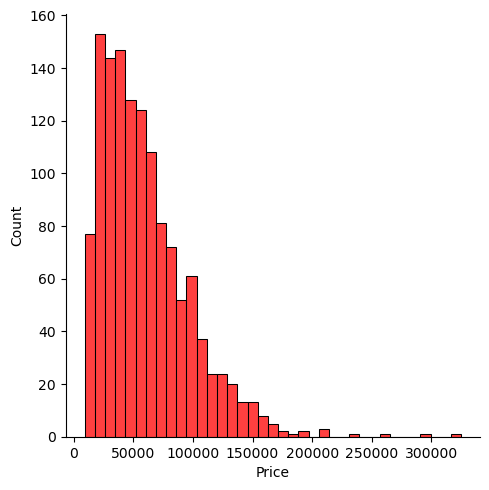

In [18]:
# sns.distplot(df['Price'],color='r')
sns.displot(df['Price'],color='r')
# left skewed on gausian surface

<Axes: xlabel='Price', ylabel='Count'>

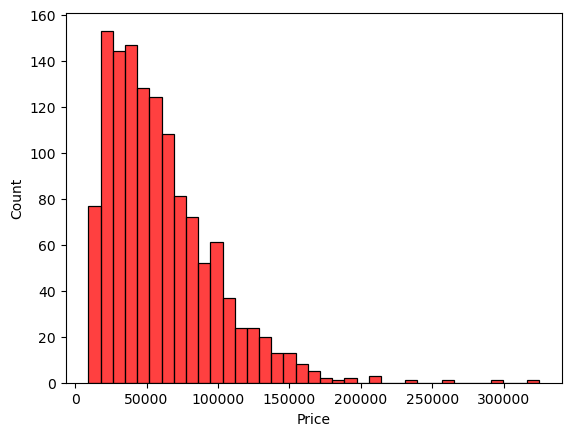

In [206]:
sns.histplot(df['Price'],color='r')

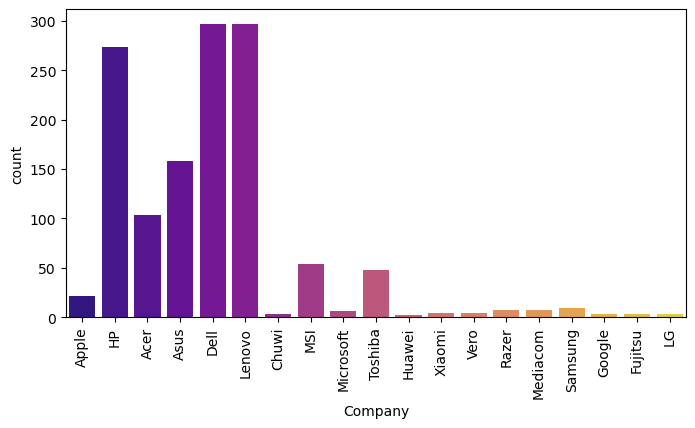

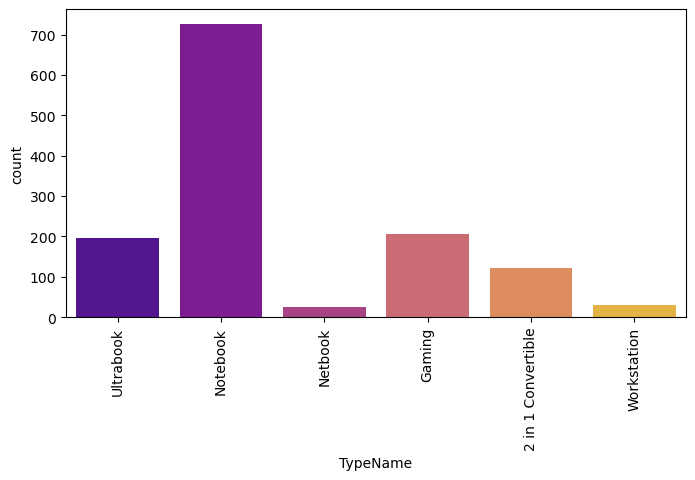

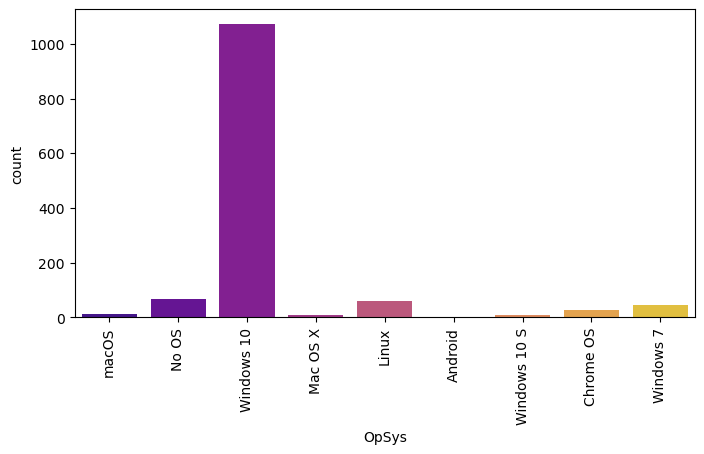

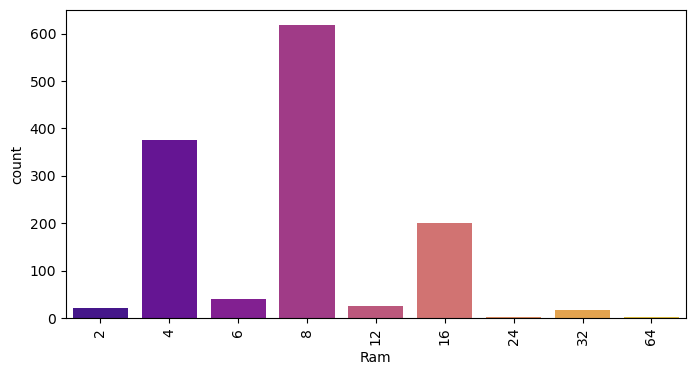

In [19]:
def drawPlot(col):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='plasma')
    plt.xticks(rotation='vertical')
    plt.show()
    
cols = ['Company', 'TypeName','OpSys','Ram']
for col in cols:
    drawPlot(col)

In [208]:
# # average price of the each laptop brand
# # this will show, the price of laptop vary as per the company
# def drawAvgPlot(col):
#     plt.figure(figsize=(8,5))
#     sns.barplot(x = df[col] , y =df['Price'])
#     plt.xticks(rotation='vertical')
#     plt.show()
# cols = df.drop(['Price'],axis =1)
# for col in cols:
#     drawAvgPlot(col)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

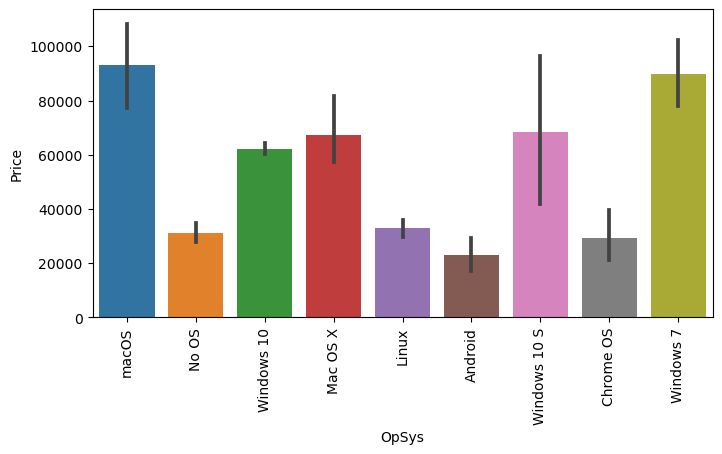

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['OpSys'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(x = df['Gpu'] , y =df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

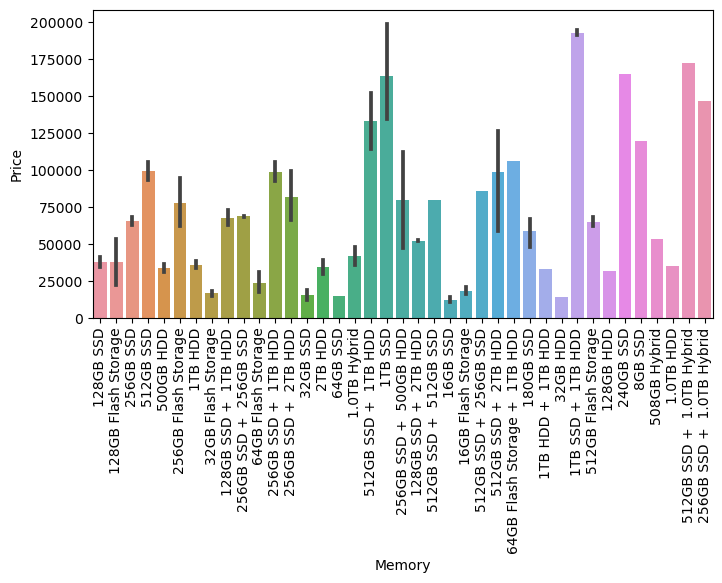

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Memory'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

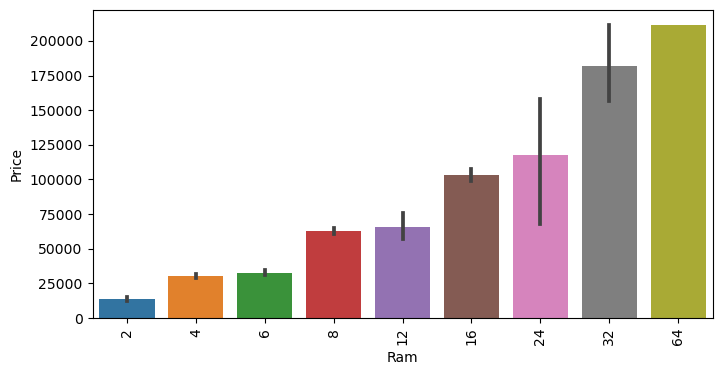

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Ram'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

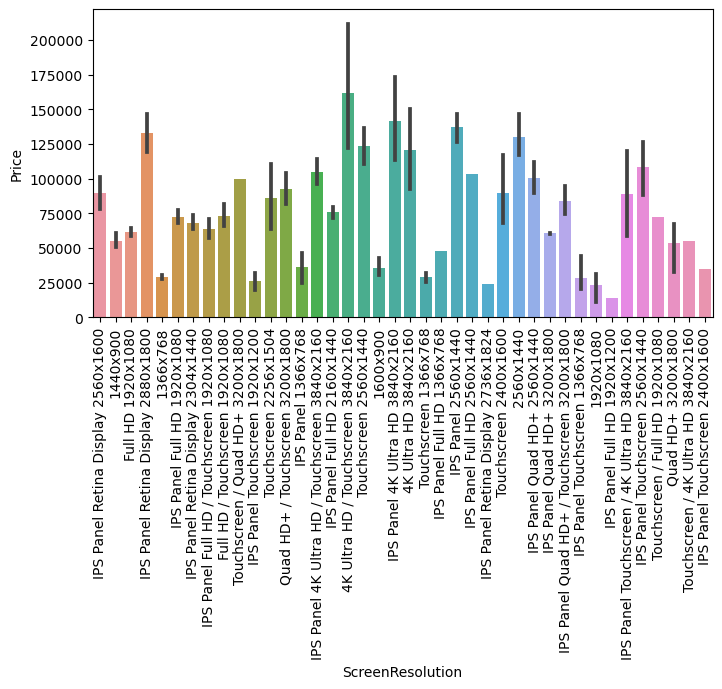

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['ScreenResolution'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

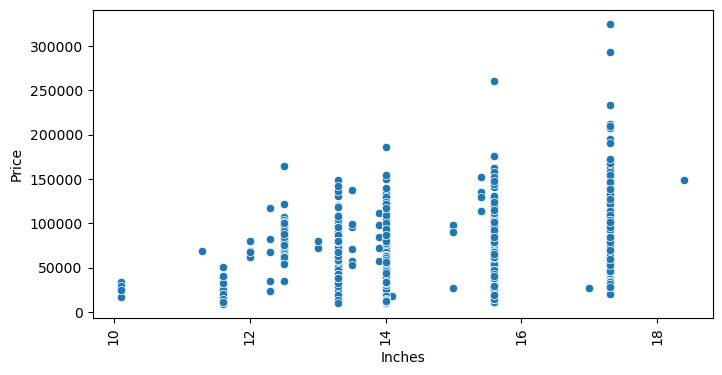

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = df['Inches'] , y =df['Price'])
# sns.barplot(x = df['Inches'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [26]:
# plt.figure(figsize=(8,4))
# sns.barplot(x = df['Cpu'] , y =df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

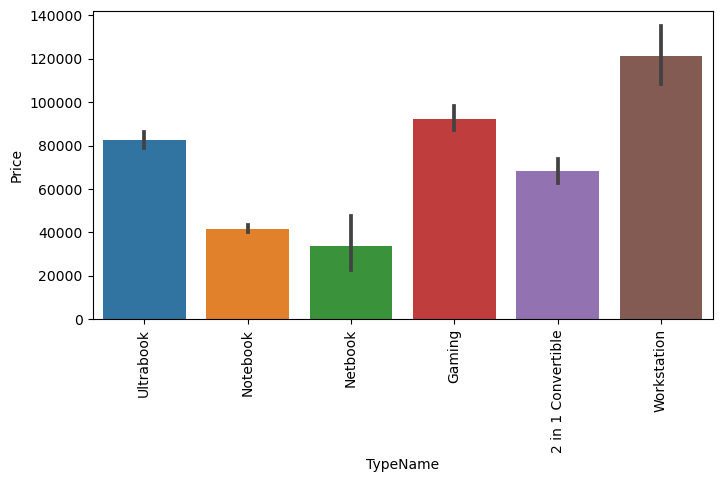

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['TypeName'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

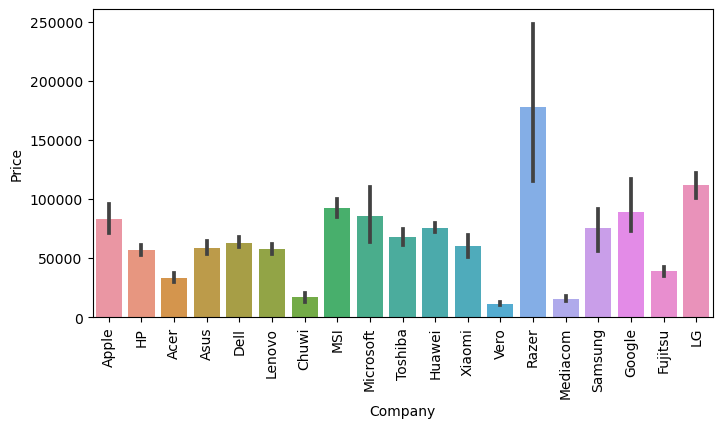

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Company'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [30]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0  )

In [31]:
df.TouchScreen.value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

In [32]:
# df.sample()
# df.tail()
# df.head()

<Axes: xlabel='TouchScreen', ylabel='count'>

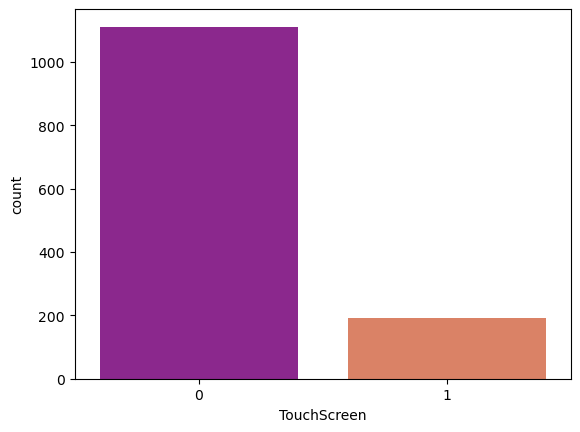

In [33]:
sns.countplot(data = df, x= df['TouchScreen'],palette='plasma')

<Axes: xlabel='TouchScreen', ylabel='Price'>

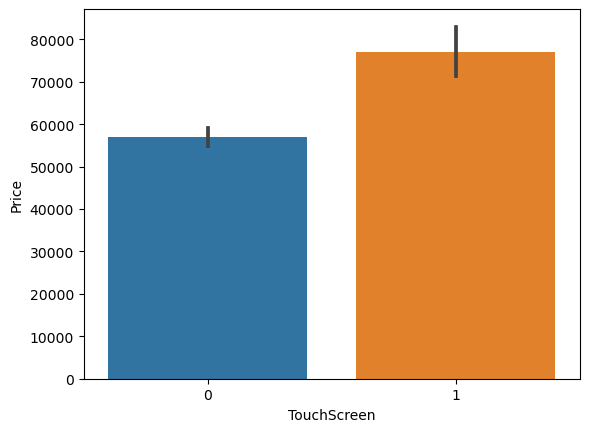

In [34]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [35]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0  )

In [36]:
df.IPS.value_counts()

0    938
1    365
Name: IPS, dtype: int64

<Axes: xlabel='IPS', ylabel='count'>

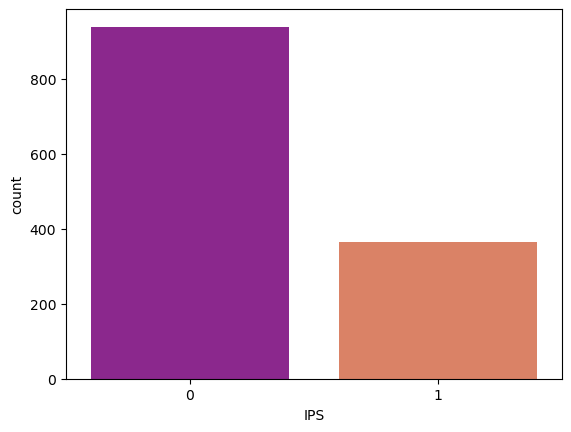

In [37]:
sns.countplot(data = df, x = df['IPS'] , palette='plasma')

<Axes: xlabel='IPS', ylabel='Price'>

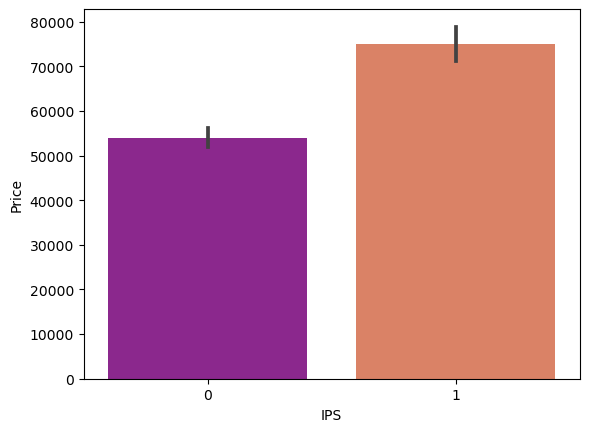

In [38]:
sns.barplot(x = df['IPS'], y=df['Price'] , palette='plasma')

In [39]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
397,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,49976.6400,0,1
350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1,0
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,68198.4000,0,0
440,Lenovo,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,27652.3200,0,0
940,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75,74538.7200,0,1


In [40]:
splitscreen = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res']= splitscreen[0]
df['Y_res']= splitscreen[1]

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [42]:
df['X_res'].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [43]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x: x[0])

In [44]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
856,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.0,23922.72,0,0,1366,768


In [45]:
df['X_res'] =df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_10216\2584852893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

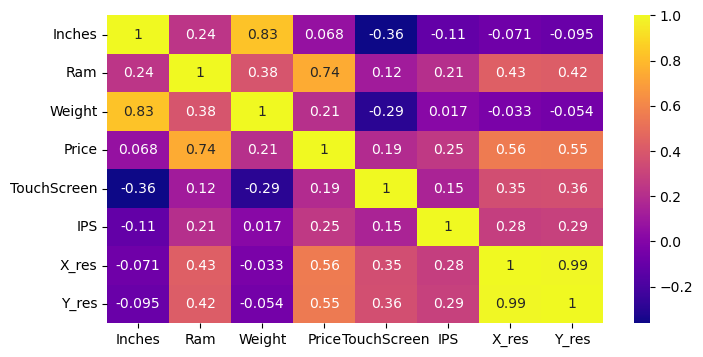

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [48]:
df.X_res.unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [242]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_14696\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [49]:
# df['PPI'] = (((df['X_res']**2 + df['Y_res']**2))**0.5)/df['Inches'].astype('float')

In [50]:
df['PPI'] = (((df['X_res']**2 + df['Y_res']**2)**0.5)/df['Inches']).astype('float')

In [179]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [51]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_10216\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [246]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS',
       'X_res', 'Y_res', 'PPI'],
      dtype='object')

In [52]:
df.drop(['Inches','X_res','Y_res','ScreenResolution'],axis =1 , inplace=True)

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [256]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [54]:
df['CPU_'] = df['Cpu'].apply(lambda text: " ".join(text.split()[:3]))

In [55]:
df.CPU_.value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [56]:
def processCPU(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if 'Intel' in text:
            return 'Intel Processor'
        else:
            return 'AMD processor'
        
df['CPU_'] = df['CPU_'].apply(lambda text: processCPU(text))

In [57]:
df['CPU_'].value_counts()

Intel Core i7      527
Intel Core i5      423
Intel Processor    154
Intel Core i3      136
AMD processor       63
Name: CPU_, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor')])

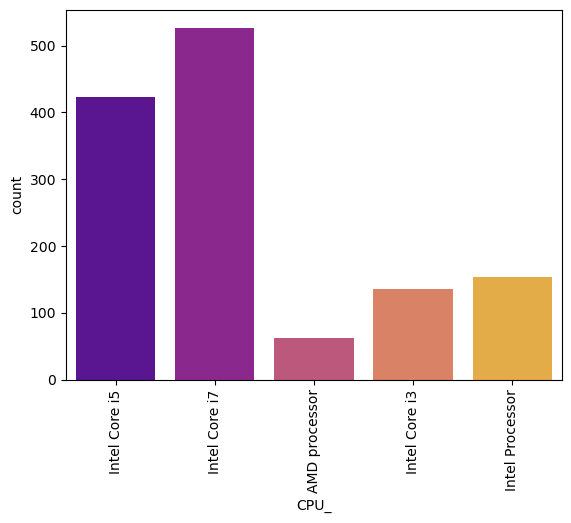

In [58]:
sns.countplot(data=df,x=df['CPU_'],palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor')])

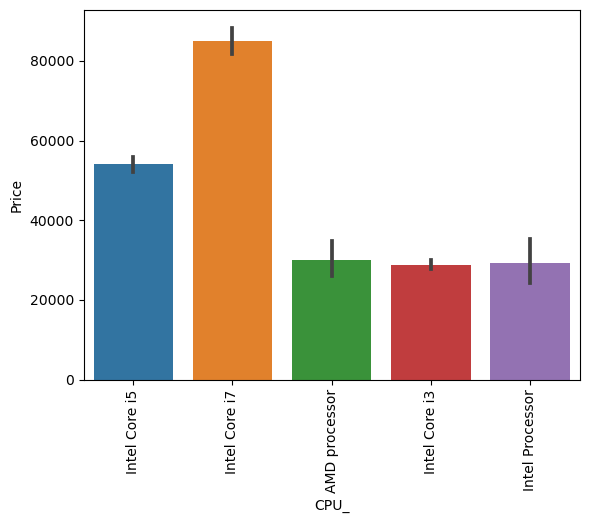

In [59]:
sns.barplot(x=df['CPU_'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='count'>

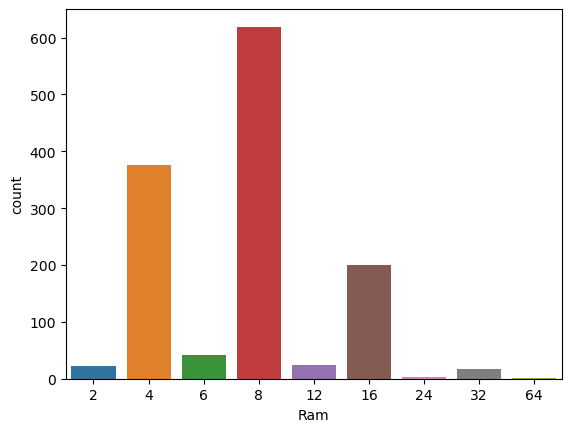

In [60]:
sns.countplot(data=df,x=df['Ram'])

<Axes: xlabel='Ram', ylabel='Price'>

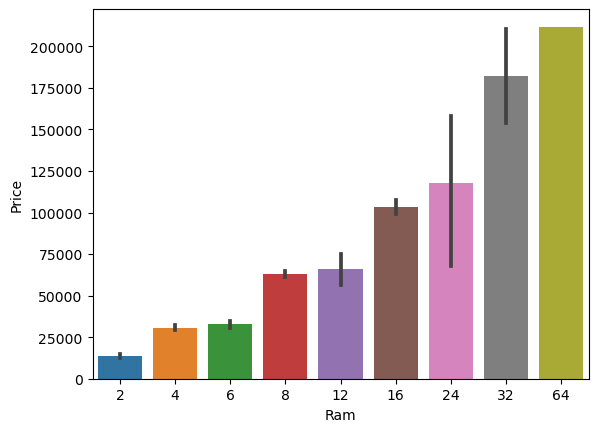

In [61]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [288]:
# df['Memory'] = df['Memory'].str.replace('TB','000')
# df['Memory'] = df['Memory'].str.replace('GB','')
# df['Memory'] = df['Memory'].str.replace('\.','', regex=True)
# splitMemory = df['Memory'].str.split('+', n=1, expand=True)

In [99]:
# df['Memory'].value_counts()
# remove the decimal points
df['Memory'] = df['Memory'].astype(str).replace('\.','',regex=True)

# remove the GB words
df['Memory'] = df['Memory'].str.replace('GB','')
# convert tb 

df['Memory'] = df['Memory'].str.replace('TB','000')

splitMemory = df['Memory'].str.split('+' , n = 1, expand=True)

splitMemory
# df['Memory'].value_counts()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [124]:
df['first'] = splitMemory[0]
df['second'] = splitMemory[1]

In [125]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [128]:
df['second'].fillna(0,inplace=True)

df['second'].value_counts()

0                 1095
  1000 HDD         185
  2000 HDD          15
  256 SSD            3
  500 HDD            2
  10000 Hybrid       2
  512 SSD            1
Name: second, dtype: int64

In [129]:
def applyChange(value):
    df['Layer1'+value] = df['first'].apply(lambda x: 1 if value in x else 0)
list_to_aplly = ['HDD','SSD','Hybrid','FlashStorge']

for i in list_to_aplly:
    applyChange(i)

In [130]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,Layer1Hybrid,Layer1FlashStorge,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorge,HDD,SDD,Flash Storage,Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df['first'] = df['first'].str.replace(r'\D','',regex=True)
df['first'].value_counts()

256      508
1000     240
128      177
512      140
500      132
32        45
64        17
2000      16
10000     10
16        10
180        5
240        1
8          1
508        1
Name: first, dtype: int64

In [136]:
df.isna().sum()
# df['second'].isna().sum()
df.fillna(0, inplace=True)
df['second'].isna().sum()


0

In [140]:
def applyChange_(value):
    df['Layer2'+value] = df['second'].apply(lambda x: 1 if value in x else 0)
list_to_aplly1 = ['HDD','SSD','Hybrid','FlashStorge']

for i in list_to_aplly1:
    applyChange_(i)

TypeError: argument of type 'float' is not iterable

In [138]:
df['second'].unique()
df['second'] = df['second'].str.replace(r'\D','',regex=True)
df['second'].value_counts()

1000     185
2000      15
256        3
500        2
10000      2
512        1
Name: second, dtype: int64

In [139]:
df['first'] = df['first'].astype('int32')
df['second'] = df['second'].astype('int32')

ValueError: cannot convert float NaN to integer

In [87]:
df['HDD'] = (df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SDD'] = (df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Flash Storage'] = (df['first']*df['Layer1FlashStorge'] + df['second']*df['Layer2FlashStorge'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])

In [88]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_', 'first', 'second',
       'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1FlashStorge',
       'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2FlashStorge', 'HDD',
       'SDD', 'Flash Storage', 'Hybrid'],
      dtype='object')

In [90]:
df.isna().sum()

Company                 0
TypeName                0
Cpu                     0
Ram                     0
Memory                  0
Gpu                     0
OpSys                   0
Weight                  0
Price                   0
TouchScreen             0
IPS                     0
PPI                     0
CPU_                    0
first                   0
second               1095
Layer1HDD               0
Layer1SSD               0
Layer1Hybrid            0
Layer1FlashStorge       0
Layer2HDD               0
Layer2SSD               0
Layer2Hybrid            0
Layer2FlashStorge       0
HDD                  1095
SDD                  1095
Flash Storage        1095
Hybrid               1095
dtype: int64